<h1>Regresion lineal</h1>
<h4>Datos sobre los pasajeros del Titanic</h4>
<h5>Lina Tatiana Samboni Muñoz, Grupo:46</h5>
Importar datos y librerias 

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Cargar el dataset
titanic_data = pd.read_csv('Titanic-Dataset.csv')

print(titanic_data.columns)
print(titanic_data.head())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0

Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesarioy seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [74]:
# Convertir nombres de columnas a minúsculas para evitar problemas con mayúsculas/minúsculas
titanic_data.columns = titanic_data.columns.str.lower()

# Seleccionar las columnas relevantes
selected_columns = ['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']
titanic_data = titanic_data[selected_columns]

# Manejar valores nulos, si es necesario
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
titanic_data['fare'].fillna(titanic_data['fare'].median(), inplace=True)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

# Convertir variables categóricas a numéricas
titanic_data = pd.get_dummies(titanic_data, columns=['sex', 'embarked'])


Dividir el dataset en Train y Test para evaluar correctamente el 
modelo

In [65]:
# Dividir el dataset en Train y Test
X = titanic_data.drop(columns=['survived', 'name', 'ticket', 'cabin'])
y = titanic_data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entrenar el modelo configurando los diferentes hiperparámetros.

In [79]:
from sklearn.metrics import mean_squared_error
# Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)
# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE) en el conjunto de prueba:", mse)

Error cuadrático medio (MSE) en el conjunto de prueba: 0.1564245810055866


Un MSE de 0.156 indica que el modelo tiene un error cuadrático medio de aproximadamente 0.156. Cuanto más bajo sea el valor del MSE, mejor será el rendimiento del modelo, ya que indica que las predicciones del modelo están más cercanas a los valores reales.

Por lo tanto, un MSE de 0.156 es relativamente bajo y sugiere que el modelo tiene un buen ajuste a los datos de prueba, lo que indica que las predicciones del modelo son bastante precisas en promedio.

Evaluar el desempeño del modelo en el conjuntode Test con 
métricas como precisión, recall, F1-scor.,

In [78]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Importancia de las características
importances = rf_model.feature_importances_
features = X.columns

# Crear un DataFrame para visualizar
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179

Accuracy: 0.8435754189944135


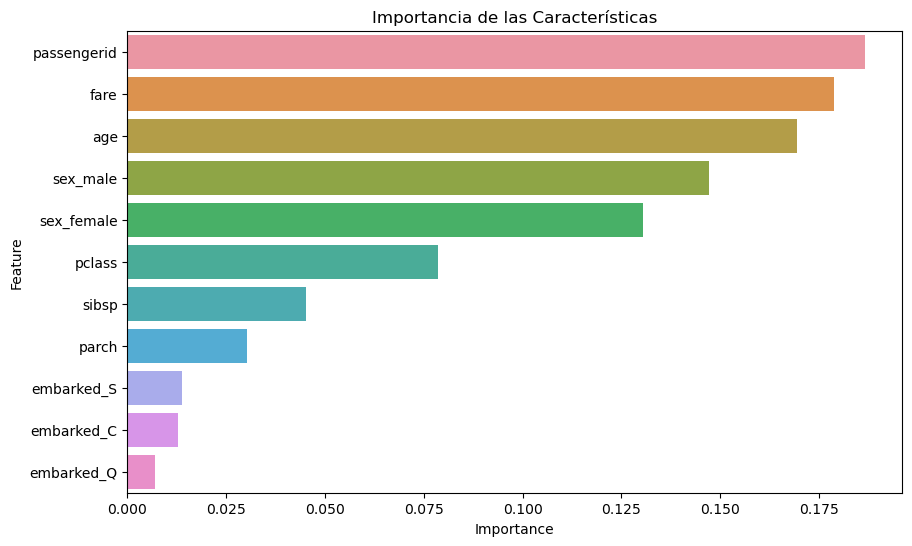

In [68]:
# Crear un gráfico de barras para la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de las Características')
plt.show()


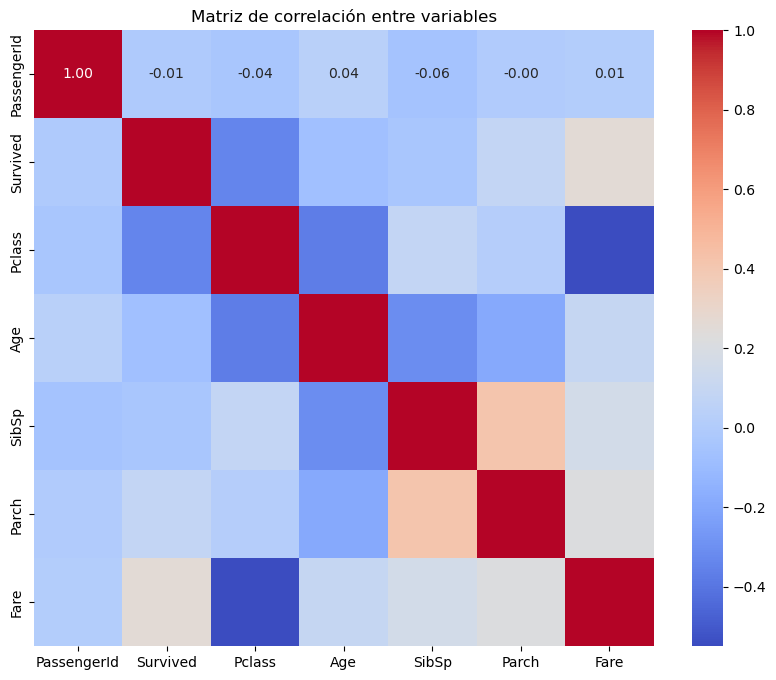

In [69]:
# Cargar el archivo CSV modificado en un DataFrame
archivo_csv = r'D:\Ingenieria en Sistemas\5. Quinto Semestre\Analisis de datos\Tarea 5\Anexo 6 - Dataset Titanic\Titanic-Dataset.csv'
df = pd.read_csv(archivo_csv)

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de correlación entre variables')
plt.show()

C:\Users\ltsam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


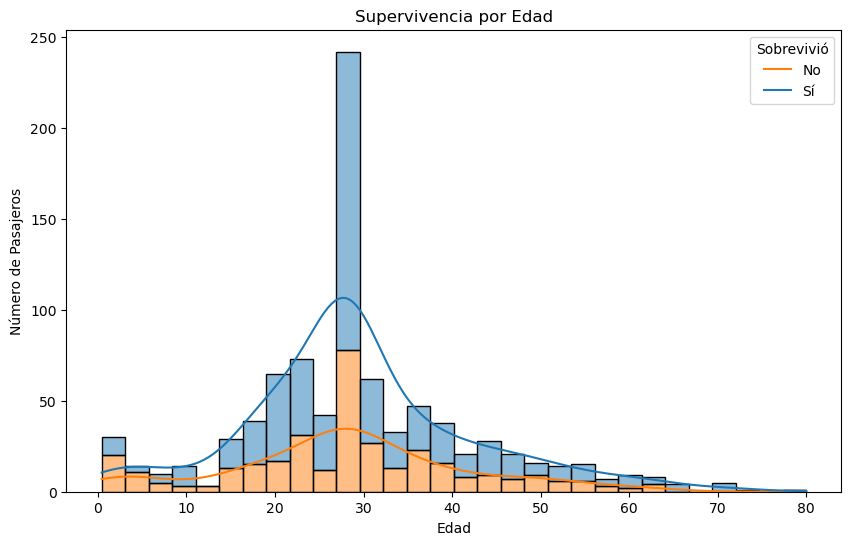

In [70]:
import pandas as pd

# Reemplazar valores infinitos con NaN en todo el DataFrame
titanic_data.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
# Convertir valores en la columna survived a cadenas
titanic_data['survived'] = titanic_data['survived'].astype(str)
# Crear un gráfico de barras para la supervivencia por edad
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='age', hue='survived', multiple='stack', bins=30, kde=True)
plt.xlabel('Edad')
plt.ylabel('Número de Pasajeros')
plt.title('Supervivencia por Edad')
plt.legend(title='Sobrevivió', loc='upper right', labels=['No', 'Sí'])
plt.show()

el mayor numero de personas que sobrevivio estan entre los 28 y 30 años 

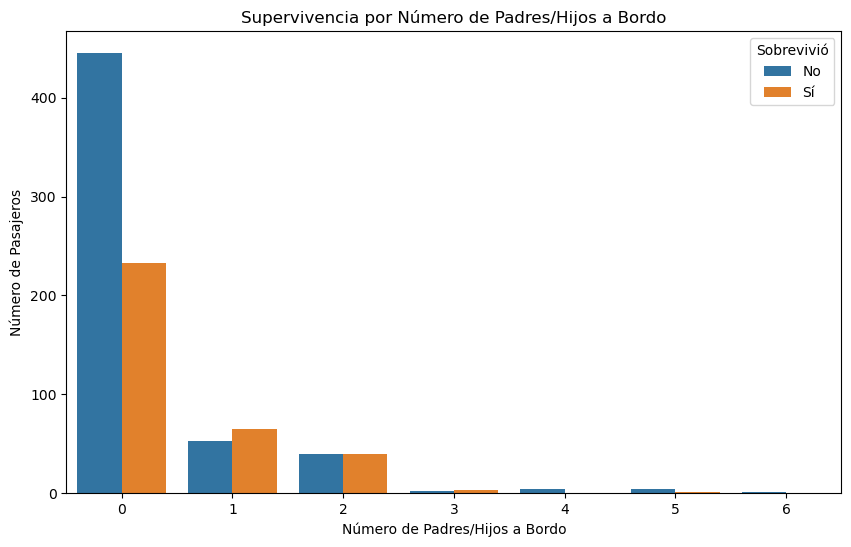

In [71]:
# Crear un gráfico de barras para la supervivencia por número de padres/hijos a bordo
plt.figure(figsize=(10, 6))
sns.countplot(x='parch', hue='survived', data=titanic_data)
plt.xlabel('Número de Padres/Hijos a Bordo')
plt.ylabel('Número de Pasajeros')
plt.title('Supervivencia por Número de Padres/Hijos a Bordo')
plt.legend(title='Sobrevivió', loc='upper right', labels=['No', 'Sí'])
plt.show()